<a href="https://colab.research.google.com/github/johann-liebert1/Fuel-Efficiency-Prediction/blob/main/FuelEfiiciencyPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.shape

(398, 9)

In [ ]:
print(df.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


In [ ]:
df.axes

[RangeIndex(start=0, stop=398, step=1),
 Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'model year', 'origin', 'car name'],
       dtype='object')]

In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
df.size

3582

In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


## Performing EDA

### Here 'horsepower' column should conatain all Integer values but its data type is Object

In [ ]:
df['horsepower']=df['horsepower'].astype(int)

ValueError: ignored

### From Error we come to know there is unknown value '?' in the column

In [ ]:
count=0
for i in df['horsepower']:
  if i == '?' :
    count+=1
print(count)

6


#### There are 6 rows with "?"
### We can remove the rows

In [ ]:
# replace '?' with NAN
df['horsepower']=df['horsepower'].replace('?',pd.NA)

In [ ]:
# Removing th null values
df=df.dropna()

In [ ]:
df['horsepower']=df['horsepower'].astype(int)

<ipython-input-14-c1b78870ed9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower']=df['horsepower'].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
print(df['model year'].unique(),"\n")
print("The value counts of years is: ")
print(df['model year'].value_counts())

[70 71 72 73 74 75 76 77 78 79 80 81 82] 

The value counts of years is: 
73    40
78    36
76    34
75    30
82    30
70    29
79    29
72    28
77    28
81    28
71    27
80    27
74    26
Name: model year, dtype: int64


In [ ]:
print(df.nunique())
#print(df['car name'].value_counts())

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model year       13
origin            3
car name        301
dtype: int64


### We will now drop the [model year, car name] columns as it is not helping in aur analysis

In [ ]:
df.drop(columns=['car name','model year'],inplace=True)

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130,3504,12.0,1
1,15.0,8,350.0,165,3693,11.5,1
2,18.0,8,318.0,150,3436,11.0,1
3,16.0,8,304.0,150,3433,12.0,1
4,17.0,8,302.0,140,3449,10.5,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(df['cylinders'].unique(),"\n")
print("The value counts of the Cylinders is: ")
print(df['cylinders'].value_counts())

[8 4 6 3 5] 

The value counts of the Cylinders is: 
4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64


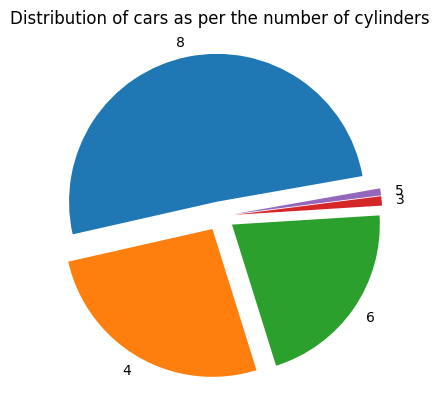

In [ ]:
plt.pie(df['cylinders'].value_counts(),
        labels=df['cylinders'].unique(),
        explode=(0.1,0.1,0.1,0.1,0.1),
        startangle=10)
plt.title("Distribution of cars as per the number of cylinders")
plt.show()

In [ ]:
print(df['origin'].unique(),"\n")

print(df['origin'].value_counts())

[1 3 2] 

1    245
3     79
2     68
Name: origin, dtype: int64


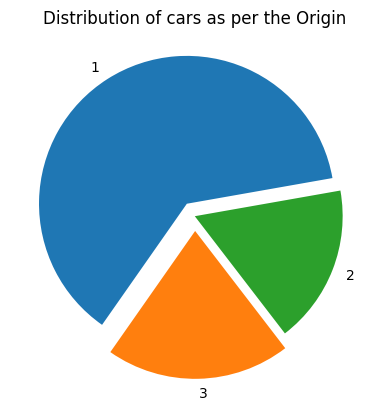

In [ ]:
plt.pie(df['origin'].value_counts(),
        labels=df['origin'].unique(),
        explode=(0.1,0.1,0),
        startangle=10)
plt.title("Distribution of cars as per the Origin")
plt.show()

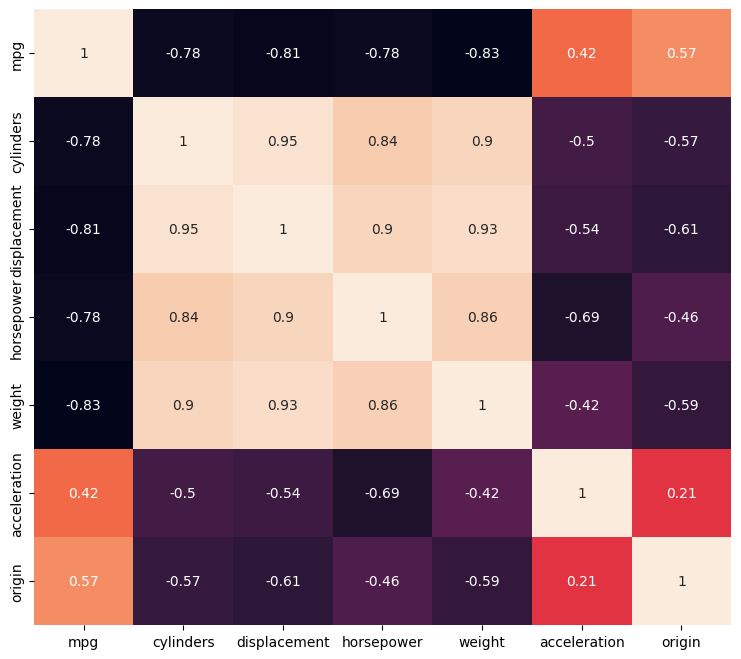

In [ ]:
plt.figure(figsize=(9, 8))
sns.heatmap(df.corr(),
           annot=True,
           cbar=False)
plt.show()

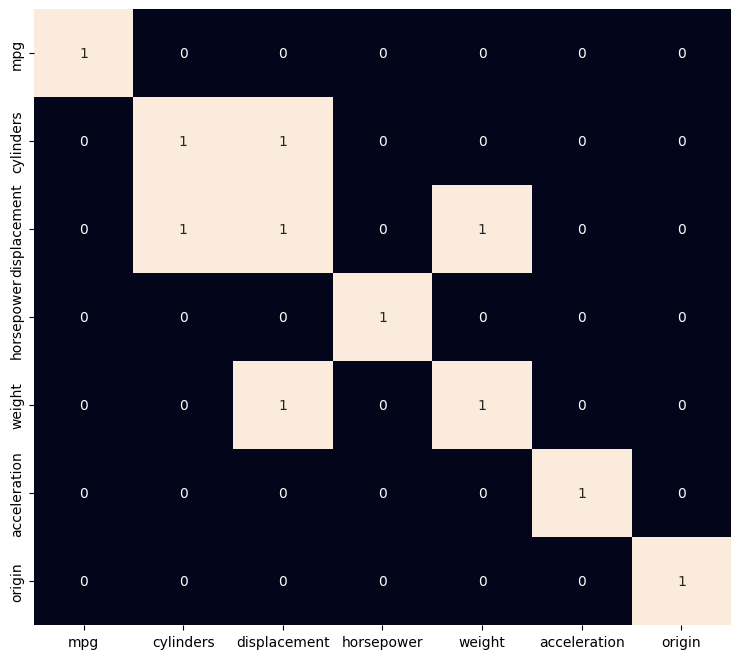

In [ ]:
plt.figure(figsize=(9, 8))
sns.heatmap(df.corr()>0.9,
           annot=True,
           cbar=False)
plt.show()

#### here displacement shows high collinearity, so can remove it

In [ ]:
df.drop('displacement',axis=1,inplace=True)

### Performing one-hot encoding in Origin

In [ ]:
df = pd.get_dummies(data=df, columns=['origin'])


In [ ]:
df.rename(columns={'origin_1':'USA','origin_2':'Europe','origin_3':'Japan'},inplace=True)

In [ ]:
df.head()

,mpg,cylinders,horsepower,weight,acceleration,USA,Europe,Japan
0,18.0,8,130,3504,12.0,1,0,0
1,15.0,8,165,3693,11.5,1,0,0
2,18.0,8,150,3436,11.0,1,0,0
3,16.0,8,150,3433,12.0,1,0,0
4,17.0,8,140,3449,10.5,1,0,0


In [ ]:
df.describe()

,mpg,cylinders,horsepower,weight,acceleration,USA,Europe,Japan
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,104.469388,2977.584184,15.541327,0.625000,0.173469,0.201531
std,7.805007,1.705783,38.491160,849.402560,2.758864,0.484742,0.379136,0.401656
min,9.000000,3.000000,46.000000,1613.000000,8.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,75.000000,2225.250000,13.775000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,93.500000,2803.500000,15.500000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,126.000000,3614.750000,17.025000,1.000000,0.000000,0.000000
max,46.600000,8.000000,230.000000,5140.000000,24.800000,1.000000,1.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7be38614b2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7be38614b820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7be3861494e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7be38614bd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7be38617c040>],
 'means': []}

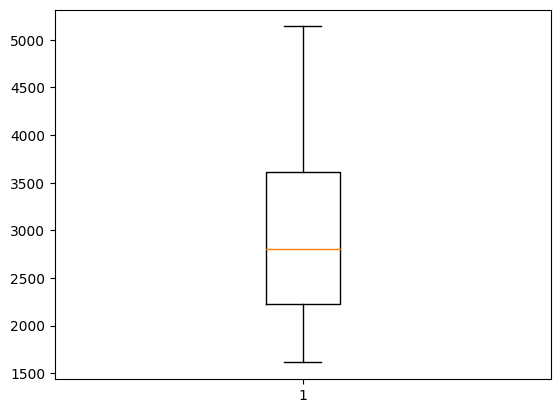

In [ ]:
plt.boxplot(df['weight'])

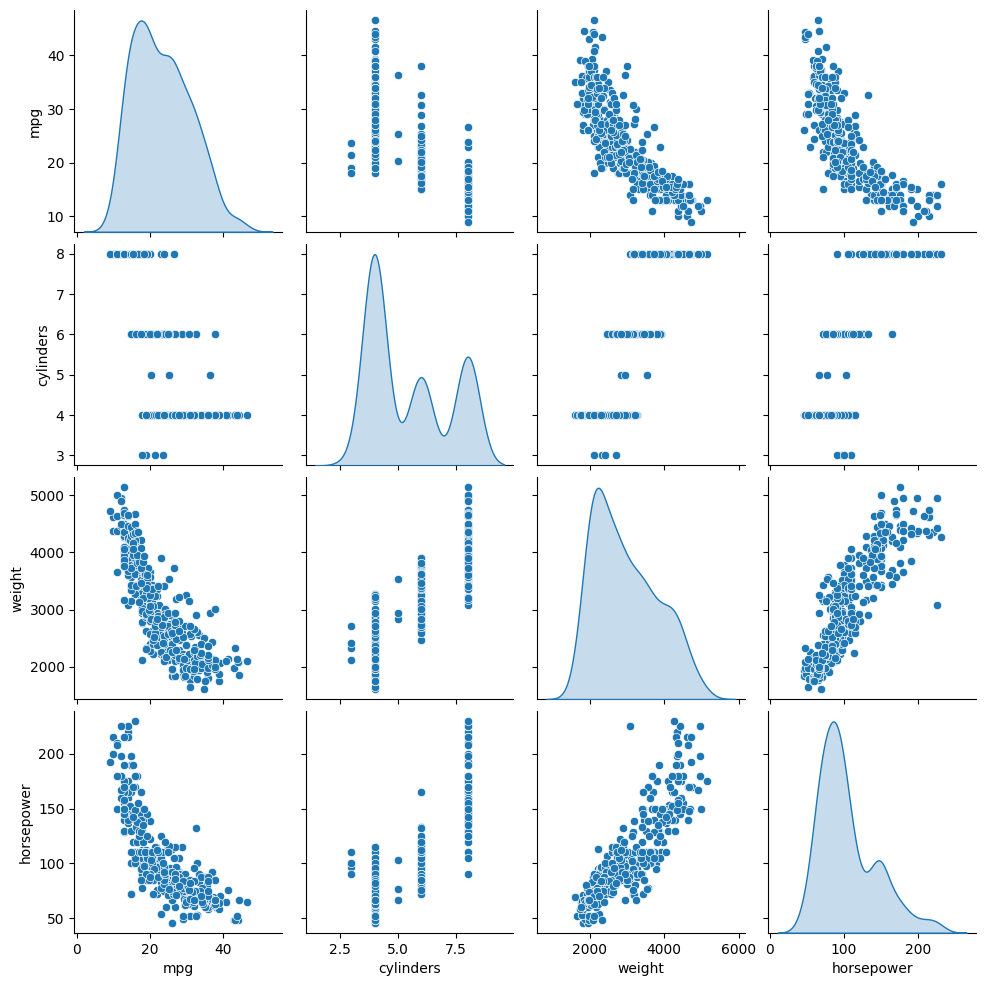

In [ ]:
sns.pairplot(df[["mpg", "cylinders", "weight","horsepower"]], diag_kind="kde")
plt.show()

### Doing the Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,mpg,cylinders,horsepower,weight,acceleration,USA,Europe,Japan
0,18.0,8,130,3504,12.0,1,0,0
1,15.0,8,165,3693,11.5,1,0,0
2,18.0,8,150,3436,11.0,1,0,0
3,16.0,8,150,3433,12.0,1,0,0
4,17.0,8,140,3449,10.5,1,0,0


In [ ]:
X=df.iloc[:,1:] # [cylinders,horsepower,weight,acceleration,USA,Europe,Japan]
y=df.iloc[:,0] # mpg

In [ ]:
X.head()

,cylinders,horsepower,weight,acceleration,USA,Europe,Japan
0,8,130,3504,12.0,1,0,0
1,8,165,3693,11.5,1,0,0
2,8,150,3436,11.0,1,0,0
3,8,150,3433,12.0,1,0,0
4,8,140,3449,10.5,1,0,0


In [ ]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=20)

In [ ]:
X_train.head()

,cylinders,horsepower,weight,acceleration,USA,Europe,Japan
271,4,105,2745,16.7,1,0,0
258,6,105,3380,15.8,1,0,0
321,4,75,2265,15.2,0,0,1
328,4,67,3250,21.8,0,1,0
310,4,60,1968,18.8,0,0,1


In [ ]:
y_test.shape

(79,)

### Normalizing The data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_test_scaled

array([[ 1.54176955,  1.8657841 ,  0.7334201 , -2.08220234,  0.78319989,
        -0.48698475, -0.48195795],
       [-0.84131128, -0.86481864, -1.22805199, -0.60326813, -1.27681326,
         2.05345238, -0.48195795],
       [ 1.54176955,  3.52069485,  1.58961824, -2.26706912,  0.78319989,
        -0.48698475, -0.48195795],
       [-0.84131128, -0.89240049, -0.95861901, -0.27050793,  0.78319989,
        -0.48698475, -0.48195795],
       [ 0.35022913, -0.4786728 , -0.43532029,  0.13619897,  0.78319989,
        -0.48698475, -0.48195795],
       [-0.84131128, -0.89240049, -0.84485842,  0.46895917, -1.27681326,
        -0.48698475,  2.07486981],
       [-0.84131128, -1.03030972, -1.168178  ,  1.39329305, -1.27681326,
        -0.48698475,  2.07486981],
       [ 0.35022913, -0.06494511, -0.00662248,  0.13619897,  0.78319989,
        -0.48698475, -0.48195795],
       [-0.84131128, -1.4992011 , -0.73708523,  2.98314733, -1.27681326,
         2.05345238, -0.48195795],
       [ 1.54176955,  1.0383

## Starting Regression

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X_train_scaled.shape
#X_train.shape

(313, 7)

In [ ]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7,))
model.add(Dense(249,activation='relu'))
model.add(Dense(249,activation='relu'))
model.add(Dense(149,activation='relu'))
model.add(Dense(1,activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 249)               1992      
                                                                 
 dense_2 (Dense)             (None, 249)               62250     
                                                                 
 dense_3 (Dense)             (None, 149)               37250     
                                                                 
 dense_4 (Dense)             (None, 1)                 150       
                                                                 
Total params: 101698 (397.26 KB)
Trainable params: 101698 (397.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss= 'mae',optimizer='Adam',metrics=['mape'])

In [ ]:
history=model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.08,batch_size=50)
#history=model.fit(X_train,y_train,epochs=200,validation_split=0.1)

Epoch 1/50
6/6 [==============================] - 2s 50ms/step - loss: 23.3814 - mape: 98.3225 - val_loss: 21.0513 - val_mape: 94.9139
Epoch 2/50
6/6 [==============================] - 0s 11ms/step - loss: 21.8154 - mape: 91.0843 - val_loss: 18.7858 - val_mape: 83.0617
Epoch 3/50
6/6 [==============================] - 0s 11ms/step - loss: 18.1824 - mape: 74.1373 - val_loss: 13.6601 - val_mape: 56.8372
Epoch 4/50
6/6 [==============================] - 0s 17ms/step - loss: 11.4286 - mape: 45.1395 - val_loss: 10.3609 - val_mape: 50.2932
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 9.6695 - mape: 45.7282 - val_loss: 9.7487 - val_mape: 53.1768
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 7.9449 - mape: 39.3081 - val_loss: 7.0071 - val_mape: 36.7054
Epoch 7/50
6/6 [==============================] - 0s 11ms/step - loss: 5.4897 - mape: 25.3262 - val_loss: 6.0592 - val_mape: 28.3134
Epoch 8/50
6/6 [==============================] - 0s 10ms/ste

In [ ]:
test_loss = model.evaluate(X_test_scaled, y_test)
print(test_loss)

3/3 [==============================] - 0s 6ms/step - loss: 2.9254 - mape: 12.6862
[2.925394296646118, 12.686192512512207]


In [ ]:
y_pred = model.predict(X_test_scaled)

3/3 [==============================] - 0s 7ms/step


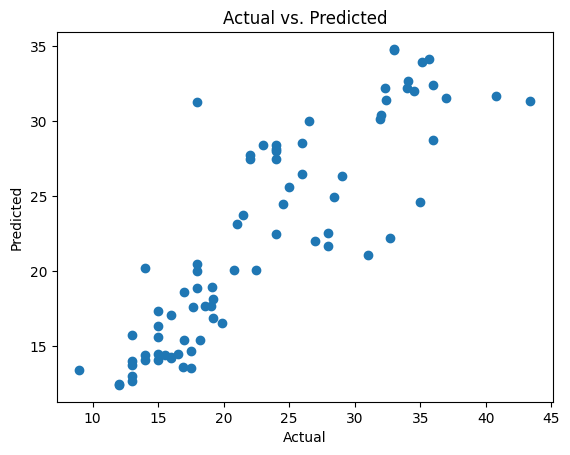

In [ ]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7418298239683945

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,mape,val_loss,val_mape
0,23.381365,98.322464,21.051296,94.913910
1,21.815376,91.084320,18.785814,83.061737
2,18.182388,74.137337,13.660127,56.837196
3,11.428581,45.139450,10.360917,50.293156
4,9.669483,45.728222,9.748669,53.176773


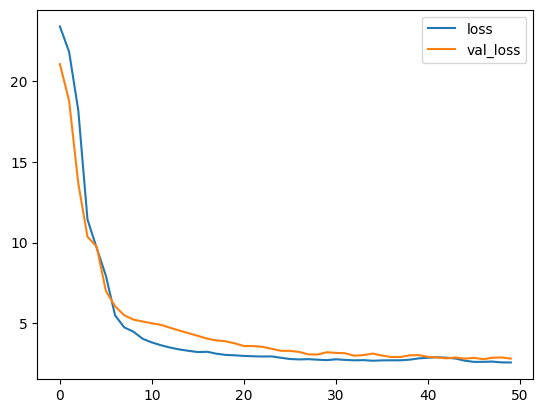

In [ ]:
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.show()

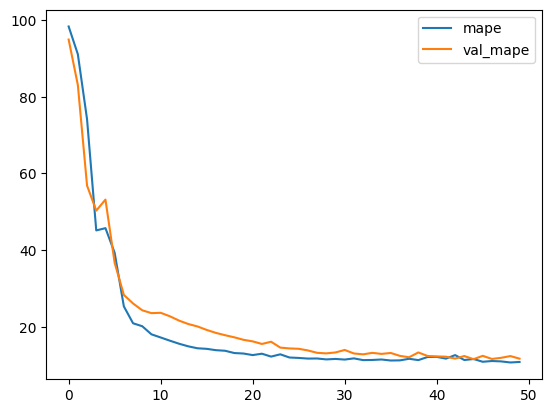

In [ ]:
history_df.loc[:, ['mape', 'val_mape']].plot()
plt.show()